In [159]:
#All the imports
import os
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import load_model

In [160]:
#defining shape and no. of classes
input_shape = (28,28,1)
num_classes = 10

#defining model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [161]:
#importing model
model = tf.keras.models.load_model('uas_digit_dataset_model.h5')
#printing model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)              

In [162]:
#load image from directory process it and then show the digit predicted
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    #inverting image
    #img = PIL.ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    print('\nPredicted Digit:  ', np.argmax(res) , ' \nPrediction Accuracy:', round(100*max(res), 4), '%')
    #return np.argmax(res), 100*max(res)


Predicted Digit:   6  
Prediction Accuracy: 89.2541 %


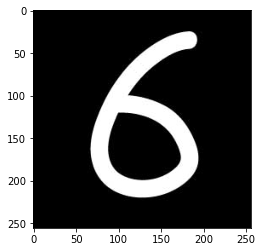

In [163]:
#path of image from directory

img_path1 = 'C:/Users/theycallmeBOT/Desktop/task/my_handwritten_digits/six2-01.png'
img_path2 = 'C:/Users/theycallmeBOT/Desktop/task/data/3/3_40.png'
#img_path3 = 'C:/Users/theycallmeBOT/Desktop/task/image.png'
test_image = Image.open(img_path1)
#test_image.show()
plt.imshow(test_image, cmap='gray')
predict_digit(test_image)